> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

training_file = "dataset/train.p"
validation_file= "dataset/valid.p"
testing_file = "dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
import numpy as np
import csv

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

# Get classes/labels readable names
signnames = {}
with open("signnames.csv", 'r') as f:
    signnames_csv = list(csv.reader(f, delimiter=","))[1:]
    signnames = {rows[0]:rows[1] for rows in signnames_csv}

print("Number of training examples \t= {}\t\tdtype:{}".format(n_train,X_train.dtype))
print("Number of validation examples \t= {}\t\tdtype:{}".format(n_validation,X_valid.dtype))
print("Number of testing examples \t= {}\t\tdtype:{}".format(n_test,X_test.dtype))
print("Number of classes \t\t= {}\t\tdtype:{}".format(n_classes,y_train.dtype))
print("\nImage data shape \t\t= {}".format(image_shape))


Number of training examples 	= 34799		dtype:uint8
Number of validation examples 	= 4410		dtype:uint8
Number of testing examples 	= 12630		dtype:uint8
Number of classes 		= 43		dtype:uint8

Image data shape 		= (32, 32, 3)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
from tabulate import tabulate

n_classes_bincount = np.bincount(y_train)
n_classes_ids = np.arange(len(n_classes_bincount))
n_classes_names = np.array([signnames[str(i)] for i in range(len(signnames))])

data = np.column_stack((n_classes_ids, n_classes_bincount,n_classes_names))
headers = ["ID","Count","Traffic Sign Name"]

train_dataset_map = tabulate(data, headers, tablefmt="github")
print(train_dataset_map)

|   ID |   Count | Traffic Sign Name                                  |
|------|---------|----------------------------------------------------|
|    0 |     180 | Speed limit (20km/h)                               |
|    1 |    1980 | Speed limit (30km/h)                               |
|    2 |    2010 | Speed limit (50km/h)                               |
|    3 |    1260 | Speed limit (60km/h)                               |
|    4 |    1770 | Speed limit (70km/h)                               |
|    5 |    1650 | Speed limit (80km/h)                               |
|    6 |     360 | End of speed limit (80km/h)                        |
|    7 |    1290 | Speed limit (100km/h)                              |
|    8 |    1260 | Speed limit (120km/h)                              |
|    9 |    1320 | No passing                                         |
|   10 |    1800 | No passing for vehicles over 3.5 metric tons       |
|   11 |    1170 | Right-of-way at the next intersection        

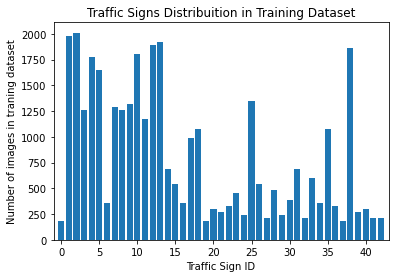

In [6]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.title("Traffic Signs Distribuition in Training Dataset")
plt.xlabel('Traffic Sign ID')
plt.ylabel('Number of images in traning dataset')
plt.xlim(-1,max(n_classes_ids)+1)
plt.bar(n_classes_ids,n_classes_bincount)
plt.show()

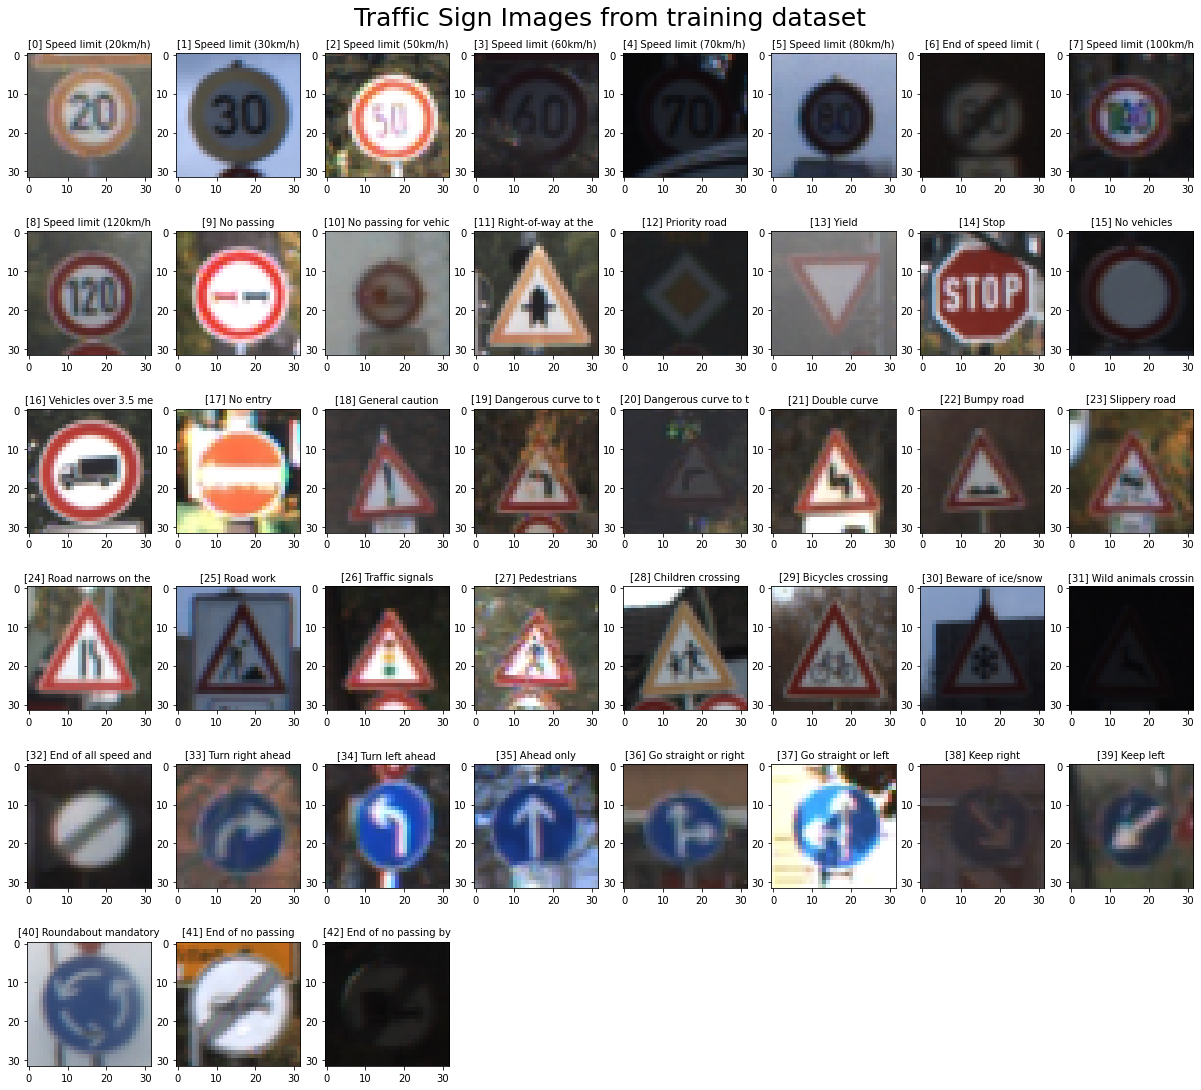

In [7]:
# Get an sample of each sign ID
plt_sample=[]
for i in range(n_classes):
    idx = np.random.choice(np.where(y_train==i)[0])
    plt_sample.append(X_train[idx])

# Show images
plt_cols_len = 8
plt_rows_len = n_classes//plt_cols_len +1
plt_fig, plt_ax = plt.subplots(plt_rows_len,plt_cols_len, figsize=(18, 16))
plt_fig.suptitle("Traffic Sign Images from training dataset", fontsize=25)

for j in range(1,plt_rows_len*plt_cols_len - n_classes+1):
    plt_ax[-1,-j].axis('off')
for i in range(n_classes):
    row = i//plt_cols_len
    col = i%plt_cols_len
    plt_ax[row][col].imshow(plt_sample[i])
    plt_ax[row][col].set_title('[{}] {}'.format(i,signnames[str(i)][:20]), fontsize=10)

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
# plt.savefig("output_images/1_traffic_sign_images2.png")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
# Preprocess dataset images
import cv2

def pre_process_image(img):
    img = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    normalized = np.zeros((32,32))
    normalized = cv2.normalize(gray,normalized,-1,1,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
    return np.expand_dims(normalized,axis=2)
# TODO: https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

In [9]:
# Normalize datasets
X_train_norm = np.array([pre_process_image(xi) for xi in X_train])
X_valid_norm = np.array([pre_process_image(xi) for xi in X_valid])
X_test_norm = np.array([pre_process_image(xi) for xi in X_test])

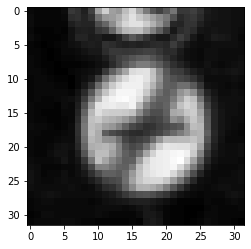

In [10]:
# Show the first image on train dataset grayscaled and normalized
normalized = pre_process_image(X_train[0])
plt.imshow(np.squeeze(normalized,axis=2), cmap='gray')
plt.show()

## Model Architecture

### Import Libraries

In [11]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from math import ceil
from sklearn.utils import shuffle
import time
from tabulate import tabulate
import itertools

training_results_filename = "training_results"
arch_names = ["L2_FC1","L2MS_FC1","L3_FC1"]

### Define functions to save and show training results

In [12]:
def save_training_results(params):

    headers = ["duration","valid_acc","test_acc","arch","EPOCH","BATCH_SIZE","RATE","l1_hw","l1_di","l1_do","l1_st","l1_mp_ks","l1_mp_st","l2_hw","l2_do","l2_st","l2_mp_ks","l2_mp_st","l2b_mp_ks","l2b_mp_st","l3_hw","l3_do","l3_st","l3_mp_ks","l3_mp_st","lfc1_d","lfc2_d","reg_kp"]

    row = []
    for h in range(len(headers)):
        if headers[h] in params:
            row.append(params[headers[h]])
        else:
            row.append(-1)
    
    current_training_results = np.array(row)
    try:
        training_results = np.loadtxt('{}.csv'.format(training_results_filename),delimiter=',')
        current_training_results = np.vstack((current_training_results,training_results))
        np.savetxt('{}.csv'.format(training_results_filename), current_training_results, fmt='%.4f', delimiter=',')
        print("Results saved in {}.csv".format(training_results_filename))
    # If any error occurs, save in a new file
    except:
        print("Creating a new training_results.csv")
        np.savetxt("{}_{}.csv".format(training_results_filename,int(time.time())), current_training_results, fmt='%.4f', delimiter=',')

    
# Load training results
def print_training_results(params=[{}], load=False, sort_column=2, max_rows=20, headers=[]):
    if(load):
        try:
            training_data = np.loadtxt('{}.csv'.format(training_results_filename), delimiter=',')
            if len(training_data.shape) == 1:
                training_data = np.expand_dims(training_data,axis=0)
            else:
                training_data = training_data[training_data[:,sort_column].argsort()][::-1][:max_rows]
            headers_full = ["duration","valid_acc","test_acc","arch","EPOCH","BATCH_SIZE","RATE","l1_hw","l1_di","l1_do","l1_st","l1_mp_ks","l1_mp_st","l2_hw","l2_do","l2_st","l2_mp_ks","l2_mp_st","l2b_mp_ks","l2b_mp_st","l3_hw","l3_do","l3_st","l3_mp_ks","l3_mp_st","lfc1_d","lfc2_d","reg_kp"]
            params = []
            for i in range(len(training_data)):
                p = {}
                for j in range(len(training_data[i])):
                    p[headers_full[j]] = training_data[i][j]
                params.append(p)
        except:
            print("Couldn't load {}.csv".format(training_results_filename))
    
    if type(params) != list:
        params = [params]

    # Check if is to show all headers
    if len(headers) == 0:
        headers = ["duration","valid_acc","test_acc","arch","EPOCH","BATCH_SIZE","RATE","l1_hw","l1_di","l1_do","l1_st","l1_mp_ks","l1_mp_st","l2_hw","l2_do","l2_st","l2_mp_ks","l2_mp_st","l2b_mp_ks","l2b_mp_st","l3_hw","l3_do","l3_st","l3_mp_ks","l3_mp_st","lfc1_d","lfc2_d","reg_kp"]

    training_data = []
    for i in range(len(params)):
        p = params[i]
        row = []
        for h in range(len(headers)):
            if headers[h] in p:
                if headers[h] == "arch" and p[headers[h]] >=0 and p[headers[h]] < len(arch_names):
                    row.append(arch_names[int(p[headers[h]])])
                elif headers[h] == "duration":
                    row.append(time.strftime("%H:%M:%S", time.gmtime(p[headers[h]])))
                else:
                    row.append(p[headers[h]])
            else:
                row.append("")
        training_data.append(row)
            
    training_table = tabulate(training_data, headers, tablefmt="pretty")
    print(training_table)

print_training_results(load=True, headers = ["duration","valid_acc","test_acc","arch","l1_hw","l1_do","l2_hw","l2_do","l3_hw","l3_do","lfc1_d","reg_kp","EPOCH","BATCH_SIZE","RATE"])

+----------+-----------+----------+--------+-------+-------+-------+-------+-------+-------+--------+--------+-------+------------+--------+
| duration | valid_acc | test_acc |  arch  | l1_hw | l1_do | l2_hw | l2_do | l3_hw | l3_do | lfc1_d | reg_kp | EPOCH | BATCH_SIZE |  RATE  |
+----------+-----------+----------+--------+-------+-------+-------+-------+-------+-------+--------+--------+-------+------------+--------+
| 00:49:39 |   0.975   |  0.949   | L3_FC1 |  3.0  | 32.0  |  3.0  | 64.0  |  3.0  | 256.0 | 100.0  |  0.7   | 100.0 |   128.0    | 0.0005 |
| 00:37:01 |   0.969   |  0.943   | L3_FC1 |  3.0  | 32.0  |  3.0  | 64.0  |  3.0  | 256.0 | 100.0  |  0.7   | 75.0  |   128.0    | 0.0005 |
| 00:23:34 |   0.96    |   0.94   | L3_FC1 |  3.0  | 32.0  |  3.0  | 64.0  |  3.0  | 256.0 | 100.0  |  0.7   | 50.0  |   128.0    | 0.0005 |
| 00:17:41 |   0.955   |   0.94   | L2_FC1 |  7.0  | 16.0  |  5.0  | 64.0  |  3.0  | 256.0 | 100.0  |  0.7   | 50.0  |   128.0    | 0.0005 |
| 00:08:59 | 

### Design Model Architectures

In [13]:
# 2 Conv Layers + 1 Classifier layer
def L2_FC1(x, params):
    mu = 0
    sigma = 0.1

    # Conv Layer 1: Convolutional. Input = 32x32x1.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(params["l1_hw"], params["l1_hw"], params["l1_di"], params["l1_do"]), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(params["l1_do"]))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, params["l1_st"], params["l1_st"], 1], padding='VALID') + conv1_b
    print("{} Conv Layer 1: Convolutional \t\t\t| Output size:{}".format(arch_names[params["arch"]],conv1.shape))
    
    # Conv Layer 1: Activation.
    conv1 = tf.nn.relu(conv1)

    # Conv Layer 1: Pooling.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, params["l1_mp_ks"], params["l1_mp_ks"], 1], strides=[1, params["l1_mp_st"], params["l1_mp_st"], 1], padding='VALID')
    print("{} Conv Layer 1: Max Pooling \t\t\t| Output size:{}".format(arch_names[params["arch"]],conv1.shape))

    # Conv Layer 2: Convolutional.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(params["l2_hw"], params["l2_hw"], params["l1_do"], params["l2_do"]), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(params["l2_do"]))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, params["l2_st"], params["l2_st"], 1], padding='VALID') + conv2_b
    print("{} Conv Layer 2: Convolutional \t\t\t| Output size:{}".format(arch_names[params["arch"]],conv2.shape))

    # Conv Layer 2: Activation.
    conv2 = tf.nn.relu(conv2)

    # Conv Layer 2: Pooling. 
    conv2 = tf.nn.max_pool(conv2, ksize=[1, params["l2_mp_ks"], params["l2_mp_ks"], 1], strides=[1, params["l2_mp_st"], params["l2_mp_st"], 1], padding='VALID')
    print("{} Conv Layer 2: Max Pooling \t\t\t| Output size:{}".format(arch_names[params["arch"]],conv2.shape))

    # Conv Layer 2: Flatten.
    fc0   = flatten(conv2)
    print("{} Conv Layer 2: Flatten \t\t\t\t| Output size:{}".format(arch_names[params["arch"]],fc0.shape))

    # Check if Classifier is 1 or 2 layers
    if(params["lfc1_d"] == 0):
        # Classifier Layer 1: Fully Connected.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(int(fc0.shape[1]), n_classes), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(n_classes))
        logits   = tf.matmul(fc0, fc1_W) + fc1_b
        print("{} Classifier Layer 1: Fully Connected \t\t| Output size:{}".format(arch_names[params["arch"]],logits.shape))

        return logits       

    else:
        # Classifier Layer 1: Fully Connected.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(int(fc0.shape[1]), params["lfc1_d"]), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(params["lfc1_d"]))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b
        print("{} Classifier Layer 1: Fully Connected \t\t| Output size:{}".format(arch_names[params["arch"]],fc1.shape))
        
        # Classifier Layer 1: Activation.
        fc1    = tf.nn.relu(fc1)

        # Classifier Layer 1: Regulatization Dropout
        if params["reg_kp"] > 0:
            fc1 = tf.nn.dropout(fc1, params["reg_kp"])
            print("{} Classifier Layer 1: Regulatization Dropout \t| Output size:{}".format(arch_names[params["arch"]],fc1.shape))

        # Classifier Layer 2: Fully Connected.
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(params["lfc1_d"], n_classes), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(n_classes))
        logits = tf.matmul(fc1, fc2_W) + fc2_b
        print("{} Classifier Layer 2: Fully Connected \t\t| Output size:{}".format(arch_names[params["arch"]],logits.shape))
        
        return logits, conv1, conv2

In [14]:
# 3 Conv Layers + 1 Classifier layer
def L3_FC1(x, params):
    mu = 0
    sigma = 0.1

    # Conv Layer 1: Convolutional. Input = 32x32x1.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(params["l1_hw"], params["l1_hw"], params["l1_di"], params["l1_do"]), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(params["l1_do"]))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, params["l1_st"], params["l1_st"], 1], padding='VALID') + conv1_b
    print("{} Conv Layer 1: Convolutional \t\t\t| Output size:{}".format(arch_names[params["arch"]],conv1.shape))
    
    # Conv Layer 1: Activation.
    conv1 = tf.nn.relu(conv1)

    # Conv Layer 1: Pooling.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, params["l1_mp_ks"], params["l1_mp_ks"], 1], strides=[1, params["l1_mp_st"], params["l1_mp_st"], 1], padding='VALID')
    print("{} Conv Layer 1: Max Pooling \t\t\t| Output size:{}".format(arch_names[params["arch"]],conv1.shape))

    # Conv Layer 2: Convolutional.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(params["l2_hw"], params["l2_hw"], params["l1_do"], params["l2_do"]), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(params["l2_do"]))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, params["l2_st"], params["l2_st"], 1], padding='VALID') + conv2_b
    print("{} Conv Layer 2: Convolutional \t\t\t| Output size:{}".format(arch_names[params["arch"]],conv2.shape))

    # Conv Layer 2: Activation.
    conv2 = tf.nn.relu(conv2)

    # Conv Layer 2: Pooling. 
    conv2 = tf.nn.max_pool(conv2, ksize=[1, params["l2_mp_ks"], params["l2_mp_ks"], 1], strides=[1, params["l2_mp_st"], params["l2_mp_st"], 1], padding='VALID')
    print("{} Conv Layer 2: Max Pooling \t\t\t| Output size:{}".format(arch_names[params["arch"]],conv2.shape))

    # Conv Layer 3: Convolutional.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(params["l3_hw"], params["l3_hw"], params["l2_do"], params["l3_do"]), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(params["l3_do"]))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, params["l3_st"], params["l3_st"], 1], padding='VALID') + conv3_b
    print("{} Conv Layer 3: Convolutional \t\t\t| Output size:{}".format(arch_names[params["arch"]],conv3.shape))

    # Conv Layer 3: Activation.
    conv3 = tf.nn.relu(conv3)

    # Conv Layer 3: Pooling. 
    conv3 = tf.nn.max_pool(conv3, ksize=[1, params["l3_mp_ks"], params["l3_mp_ks"], 1], strides=[1, params["l3_mp_st"], params["l3_mp_st"], 1], padding='VALID')
    print("{} Conv Layer 3: Max Pooling \t\t\t| Output size:{}".format(arch_names[params["arch"]],conv3.shape))

    # Conv Layer 3: Flatten.
    fc0   = flatten(conv3)
    print("{} Conv Layer 3: Flatten \t\t\t\t| Output size:{}".format(arch_names[params["arch"]],fc0.shape))

    # Check if Classifier is 1 or 2 layers
    if(params["lfc1_d"] == 0):
        # Classifier Layer 1: Fully Connected.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(int(fc0.shape[1]), n_classes), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(n_classes))
        logits   = tf.matmul(fc0, fc1_W) + fc1_b
        print("{} Classifier Layer 1: Fully Connected \t\t| Output size:{}".format(arch_names[params["arch"]],logits.shape))

        return logits       

    else:
        # Classifier Layer 1: Fully Connected.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(int(fc0.shape[1]), params["lfc1_d"]), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(params["lfc1_d"]))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b
        print("{} Classifier Layer 1: Fully Connected \t\t| Output size:{}".format(arch_names[params["arch"]],fc1.shape))
        
        # Classifier Layer 1: Activation.
        fc1    = tf.nn.relu(fc1)

        # Classifier Layer 1: Regulatization Dropout
        if params["reg_kp"] > 0:
            fc1 = tf.nn.dropout(fc1, params["reg_kp"])
            print("{} Classifier Layer 1: Regulatization Dropout \t| Output size:{}".format(arch_names[params["arch"]],fc1.shape))

        # Classifier Layer 2: Fully Connected.
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(params["lfc1_d"], n_classes), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(n_classes))
        logits = tf.matmul(fc1, fc2_W) + fc2_b
        print("{} Classifier Layer 2: Fully Connected \t\t| Output size:{}".format(arch_names[params["arch"]],logits.shape))
        
        return logits, conv1, conv2, conv3

### Full training and evaluation pipeline

In [15]:
def full_train_eval(params,save_model=False):
    # dataset that will be shuffled
    global X_train_norm
    global X_train
    global y_train
    
    tf.reset_default_graph()
    
    # Features and Labels
    x = tf.placeholder(tf.float32, (None, 32, 32, 1))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, n_classes)

    # Training Pipeline - Select archtecture accordingly with param 'arch'
    if params["arch"] == arch_names.index("L2_FC1"):
        logits = L2_FC1(x, params)[0]
    elif params["arch"] == arch_names.index("L3_FC1"):
        logits = L3_FC1(x, params)[0]
    else:
        logits = LeNetT2(x, params)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = params["RATE"])
    training_operation = optimizer.minimize(loss_operation)

    # Model Evaluation
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    if(save_model):
        saver = tf.train.Saver()

    def evaluate(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, params["BATCH_SIZE"]):
            batch_x, batch_y = X_data[offset:offset+params["BATCH_SIZE"]], y_data[offset:offset+params["BATCH_SIZE"]]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples

    # Start TF Session to train, validate and test the model
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        ts_start = time.time()
        print("\n\n### Start Training {}\t at time: {} GMT\n".format(full_training_i,time.strftime("%H:%M:%S", time.gmtime(ts_start))))

        validation_accuracy = 0.0
        for i in range(params["EPOCH"]):
            X_train_norm, X_train, y_train = shuffle(X_train_norm, X_train, y_train)
            for offset in range(0, n_train, params["BATCH_SIZE"]):
                end = offset + params["BATCH_SIZE"]
                batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
                
            validation_accuracy = evaluate(X_valid_norm, y_valid)

            print("EPOCH: {}\t| Time elapsed: {}\t| Validation Accuracy = {:.3f}".format(i+1,time.strftime("%H:%M:%S", time.gmtime(time.time()-ts_start)),validation_accuracy))
        
        test_accuracy = evaluate(X_test_norm, y_test)
        print("\nFinal Validation Accuracy \t= {:.3f}".format(validation_accuracy))
        print("      Test Accuracy \t\t= {:.3f}\n".format(test_accuracy))

        # Calcualte final duration
        time_elapsed = time.time()-ts_start

        # Save training params
        params["valid_acc"] = round(validation_accuracy,3)
        params["test_acc"]  = round(test_accuracy,3)
        params["duration"]  = round(time_elapsed,2)
        save_training_results(params)

        # Show current training results
        print_training_results([params],load=False, headers = ["duration","valid_acc","test_acc","arch","l1_hw","l1_do","l2_hw","l2_do","l3_hw","l3_do","lfc1_d","reg_kp","EPOCH","BATCH_SIZE","RATE"])
        
        # Save trained model
        if(save_model):
            saver.save(sess,"trained_models/{}_{}".format(arch_names[params["arch"]],str(int(params["duration"]*100))))

        print("\n\n### Finish Training {}\t at time: {} GMT\n".format(full_training_i,time.strftime("%H:%M:%S", time.gmtime(time.time()))))

    return True

### Execute full training + evaluation on each combination of parameters

In [27]:
# Each parameter values that will be combine to build the training queue
arch_arr = [arch_names.index("L3_FC1")]

EPOCH_arr = [75,100]
BATCH_SIZE_arr = [128]
RATE_arr = [0.0005]

l1_hw_arr = [3]
l1_di_arr = [1]
l1_do_arr = [32]
l1_st_arr = [1]
l1_mp_ks_arr = [2]
l1_mp_st_arr = [2]

l2_hw_arr = [3]
l2_do_arr = [64]
l2_st_arr = [1]
l2_mp_ks_arr = [2]
l2_mp_st_arr = [2]

l2b_mp_ks_arr = [4]
l2b_mp_st_arr = [4]

l3_hw_arr = [3]
l3_do_arr = [256]
l3_st_arr = [1]
l3_mp_ks_arr = [2]
l3_mp_st_arr = [2]

lfc1_d_arr = [100]
lfc2_d_arr = [101]
reg_kp_arr = [0.7]

params = [arch_arr,EPOCH_arr,BATCH_SIZE_arr,RATE_arr,l1_hw_arr,l1_di_arr,l1_do_arr,l1_st_arr,l1_mp_ks_arr,l1_mp_st_arr,l2_hw_arr,l2_do_arr,l2_st_arr,l2_mp_ks_arr,l2_mp_st_arr,l2b_mp_ks_arr,l2b_mp_st_arr,l3_hw_arr,l3_do_arr,l3_st_arr,l3_mp_ks_arr,l3_mp_st_arr,lfc1_d_arr,lfc2_d_arr,reg_kp_arr]

# Build a list with all possible combinations from params arrays
training_list = list(itertools.product(*params))

full_training_i = 0
for p in training_list:
    params = {
        "arch": p[0],
        "EPOCH": p[1],
        "BATCH_SIZE": p[2],
        "RATE": p[3],
        "l1_hw": p[4],
        "l1_di": p[5],
        "l1_do": p[6],
        "l1_st": p[7],
        "l1_mp_ks": p[8],
        "l1_mp_st": p[9],
        "l2_hw": p[10],
        "l2_do": p[11],
        "l2_st": p[12],
        "l2_mp_ks": p[13],
        "l2_mp_st": p[14],
        "l2b_mp_ks": p[15],
        "l2b_mp_st": p[16],
        "l3_hw": p[17],
        "l3_do": p[18],
        "l3_st": p[19],
        "l3_mp_ks": p[20],
        "l3_mp_st": p[21],
        "lfc1_d": p[22],
        "lfc2_d": p[23],
        "reg_kp": p[24]
    }
    full_training_i += 1

    print("\n### Start Full Training-evaluation iteration {}".format(full_training_i))
    print("\nparams = ".format(params))
    print("\n### Training Archtecture {}:\n".format(arch_names[params["arch"]]))
    full_train_eval(params,save_model=True)

{'arch': 2, 'EPOCH': 75, 'BATCH_SIZE': 128, 'RATE': 0.0005, 'l1_hw': 3, 'l1_di': 1, 'l1_do': 32, 'l1_st': 1, 'l1_mp_ks': 2, 'l1_mp_st': 2, 'l2_hw': 3, 'l2_do': 64, 'l2_st': 1, 'l2_mp_ks': 2, 'l2_mp_st': 2, 'l2b_mp_ks': 4, 'l2b_mp_st': 4, 'l3_hw': 3, 'l3_do': 256, 'l3_st': 1, 'l3_mp_ks': 2, 'l3_mp_st': 2, 'lfc1_d': 100, 'lfc2_d': 101, 'reg_kp': 0.7}
L3_FC1 Conv Layer 1: Convolutional 			| Output size:(?, 30, 30, 32)
L3_FC1 Conv Layer 1: Max Pooling 			| Output size:(?, 15, 15, 32)
L3_FC1 Conv Layer 2: Convolutional 			| Output size:(?, 13, 13, 64)
L3_FC1 Conv Layer 2: Max Pooling 			| Output size:(?, 6, 6, 64)
L3_FC1 Conv Layer 3: Convolutional 			| Output size:(?, 4, 4, 256)
L3_FC1 Conv Layer 3: Max Pooling 			| Output size:(?, 2, 2, 256)
L3_FC1 Conv Layer 3: Flatten 				| Output size:(?, 1024)
L3_FC1 Classifier Layer 1: Fully Connected 		| Output size:(?, 100)
L3_FC1 Classifier Layer 1: Regulatization Dropout 	| Output size:(?, 100)
L3_FC1 Classifier Layer 2: Fully Connected 		| Outpu

### Saved results ordered by test accuracy

In [16]:
print_training_results(load=True, headers = ["duration","valid_acc","test_acc","arch","l1_hw","l1_do","l2_hw","l2_do","l3_hw","l3_do","lfc1_d","EPOCH","BATCH_SIZE","RATE"])

+----------+-----------+----------+--------+-------+-------+-------+-------+-------+-------+--------+-------+------------+--------+
| duration | valid_acc | test_acc |  arch  | l1_hw | l1_do | l2_hw | l2_do | l3_hw | l3_do | lfc1_d | EPOCH | BATCH_SIZE |  RATE  |
+----------+-----------+----------+--------+-------+-------+-------+-------+-------+-------+--------+-------+------------+--------+
| 00:49:39 |   0.975   |  0.949   | L3_FC1 |  3.0  | 32.0  |  3.0  | 64.0  |  3.0  | 256.0 | 100.0  | 100.0 |   128.0    | 0.0005 |
| 00:37:01 |   0.969   |  0.943   | L3_FC1 |  3.0  | 32.0  |  3.0  | 64.0  |  3.0  | 256.0 | 100.0  | 75.0  |   128.0    | 0.0005 |
| 00:23:34 |   0.96    |   0.94   | L3_FC1 |  3.0  | 32.0  |  3.0  | 64.0  |  3.0  | 256.0 | 100.0  | 50.0  |   128.0    | 0.0005 |
| 00:17:41 |   0.955   |   0.94   | L2_FC1 |  7.0  | 16.0  |  5.0  | 64.0  |  3.0  | 256.0 | 100.0  | 50.0  |   128.0    | 0.0005 |
| 00:08:59 |   0.953   |  0.934   | L3_FC1 |  3.0  | 16.0  |  3.0  | 64.0  |

---

## Step 3: Test a Model on New Images

To get new German traffic sign images, Google street views was opened on roads near `Maximilianeum ` in Munich, Germany, to take screenshots of traffic signs and save them in `test_images` folder.

These images has to be pre processed (load, crop, grayscale and normalize) to build the new test arrays (X_test_new,X_test_new_norm and y_test_new).

The right model from training step is selected, then a pipeline is built use the selected model to predict the traffic sign type.


### Pre process the new set of Images

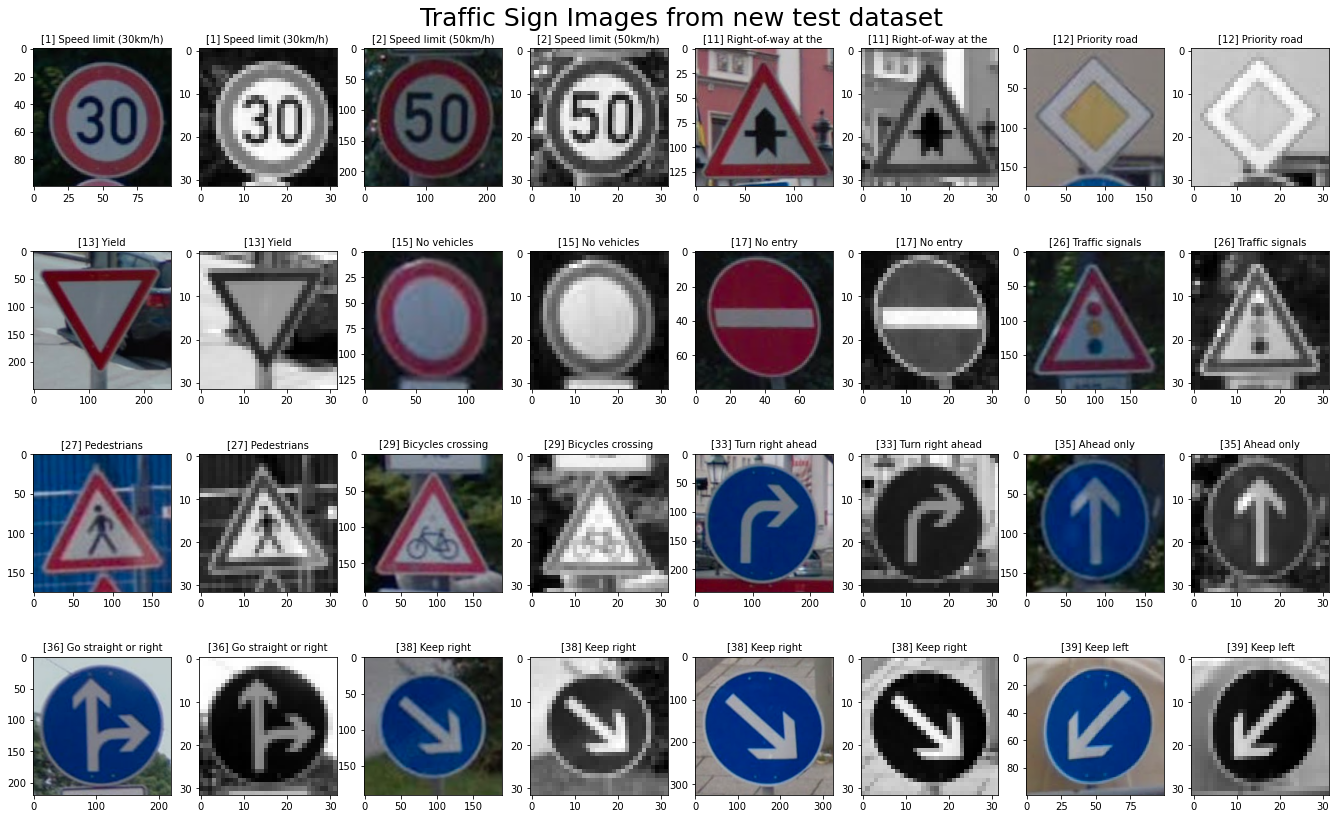

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
import os
import math

test_img_files = os.listdir("test_images/")

X_test_new = []
X_test_new_norm = []
y_test_new = []

# define crop params to crop images by image filename: img_name:[x0,y0,offset]
crop_params = {
    #
    "1_munich.png":[10,5,100],
    "2_munich.png":[50,35,225],
    "11_munich.png":[60,20,140],
    "12_munich.png":[55,15,175],
    "13_munich.png":[45,40,250],
    "15_munich.png":[30,25,135],
    "17_munich.png":[35,20,80],
    "26_munich.png":[20,0,200],
    "27_munich.png":[35,15,175],
    "29_munich.png":[75,30,190],
    "33_munich.png":[100,50,240],
    "35_munich.png":[45,30,175],
    "36_munich.png":[20,20,220],
    "38_munich.png":[50,50,190],
    "38_munich2.png":[150,75,325],
    "39_munich.png":[30,25,100],
}

# Load, crop and process each image in test_images folder to build new test arrays
for f in test_img_files:
    img = mpimg.imread("test_images/{}".format(f))

    if(f in crop_params):
        c = crop_params[f]
        img = img[c[1]:(c[1]+c[2]),c[0]:(c[0]+c[2])]
    img_norm = pre_process_image(img)

    X_test_new.append(img)
    X_test_new_norm.append(img_norm)
    y_test_new.append(int(f.split('_')[0]))

X_test_new = np.array(X_test_new)
X_test_new_norm = np.array(X_test_new_norm)
y_test_new = np.array(y_test_new)

# Order by traffic sign IDs
order = y_test_new.argsort()
X_test_new = X_test_new[order]
X_test_new_norm = X_test_new_norm[order]
y_test_new = y_test_new[order]

# Show images and the corresponded normalized images besides
plt_cols_len = 8
plt_rows_len = len(test_img_files)

plt_fig, plt_ax = plt.subplots(ceil(plt_rows_len/(plt_cols_len//2)),plt_cols_len, figsize=(20,12))
plt_fig.suptitle("Traffic Sign Images from new test dataset", fontsize=25)

for k in range(len(test_img_files)):
    i = k//(plt_cols_len//2)
    j = k%(plt_cols_len//2)
    plt_ax[i][j*2].imshow(X_test_new[k])
    plt_ax[i][j*2].set_title('[{}] {}'.format(y_test_new[k],signnames[str(y_test_new[k])][:20]), fontsize=10)
    plt_ax[i][j*2+1].imshow(np.squeeze(X_test_new_norm[k],axis=2),cmap="gray")
    plt_ax[i][j*2+1].set_title('[{}] {}'.format(y_test_new[k],signnames[str(y_test_new[k])][:20]), fontsize=10)

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

### Define the test parameters

In [18]:
trained_model_filename = "L3_FC1_297939"
test_params = {'arch': 2, 'EPOCH': 100, 'BATCH_SIZE': 128, 'RATE': 0.0005, 'l1_hw': 3, 'l1_di': 1, 'l1_do': 32, 'l1_st': 1, 'l1_mp_ks': 2, 'l1_mp_st': 2, 'l2_hw': 3, 'l2_do': 64, 'l2_st': 1, 'l2_mp_ks': 2, 'l2_mp_st': 2, 'l2b_mp_ks': 4, 'l2b_mp_st': 4, 'l3_hw': 3, 'l3_do': 256, 'l3_st': 1, 'l3_mp_ks': 2, 'l3_mp_st': 2, 'lfc1_d': 100, 'lfc2_d': 101, 'reg_kp': 0.7}
n_classes = 43

### Build the prediction pipeline based on test parameters

In [19]:
# Load the selected pre-trained model
# Reset graph
tf.reset_default_graph()

# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Select archtecture accordingly with param 'arch'
if test_params["arch"] == arch_names.index("L2_FC1"):
    logits,conv1,conv2 = L2_FC1(x, test_params)
elif test_params["arch"] == arch_names.index("L3_FC1"):
    logits,conv1,conv2,conv3 = L3_FC1(x, test_params)
else:
    logits = L2_FC1(x, test_params)

softmax_logits = tf.nn.softmax(logits)
softmax_top5 = tf.nn.top_k(softmax_logits, k=5)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

L3_FC1 Conv Layer 1: Convolutional 			| Output size:(?, 30, 30, 32)
L3_FC1 Conv Layer 1: Max Pooling 			| Output size:(?, 15, 15, 32)
L3_FC1 Conv Layer 2: Convolutional 			| Output size:(?, 13, 13, 64)
L3_FC1 Conv Layer 2: Max Pooling 			| Output size:(?, 6, 6, 64)
L3_FC1 Conv Layer 3: Convolutional 			| Output size:(?, 4, 4, 256)
L3_FC1 Conv Layer 3: Max Pooling 			| Output size:(?, 2, 2, 256)
L3_FC1 Conv Layer 3: Flatten 				| Output size:(?, 1024)
L3_FC1 Classifier Layer 1: Fully Connected 		| Output size:(?, 100)
L3_FC1 Classifier Layer 1: Regulatization Dropout 	| Output size:(?, 100)
L3_FC1 Classifier Layer 2: Fully Connected 		| Output size:(?, 43)


### Predict the Sign Type for Each Image

In [20]:
test_predictions = []
# Start tf session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Restore pre trained model
    saver2 = tf.train.Saver()
    saver2.restore(sess, "trained_models/"+trained_model_filename)
    print("Model {} restored".format(trained_model_filename))

    print("\n### Start predicting on new test set with a size of {} images".format(len(X_test_new_norm)))
    
    # Iterate over all test images
    for i in range(len(X_test_new_norm)):
        prediction = sess.run(softmax_top5, feed_dict={x:[ X_test_new_norm[i]], y: [y_test_new[i]]})
        test_predictions.append([i,y_test_new[i],prediction])
    
print("\n### Finished {} predictions".format(len(test_predictions)))

INFO:tensorflow:Restoring parameters from trained_models/L3_FC1_297939
Model L3_FC1_297939 restored

### Start predicting on new test set with a size of 16 images

### Finished 16 predictions


### Analyze Performance

In [21]:
# Calculate based on the test_predictions array of results built in the previous step
performance = 100.0 * sum([ sign_id == pred_sign_id[1][0][0] for _,sign_id,pred_sign_id in test_predictions ]) / len(test_predictions)

print("Test preformance with model {} is {:.2f}%".format(trained_model_filename, performance))

Test preformance with model L3_FC1_297939 is 100.00%


In [22]:
# Calculate performance using tensorflow functions
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Restore pre trained model
    saver2 = tf.train.Saver()
    saver2.restore(sess, "trained_models/"+trained_model_filename)
    print("Model {} restored".format(trained_model_filename))

    accuracy = sess.run(accuracy_operation, feed_dict={x: X_test_new_norm, y: y_test_new})
    print("\nTest preformance with model {} is {:.2f}%".format(trained_model_filename, accuracy*100))

INFO:tensorflow:Restoring parameters from trained_models/L3_FC1_297939
Model L3_FC1_297939 restored

Test preformance with model L3_FC1_297939 is 100.00%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [23]:
# Prepare test predictions results to show in tabulate
test_data = []
for i in range(len(test_predictions)):
    test_data.append([
        test_predictions[i][0],
        signnames[str(test_predictions[i][1])],
        test_predictions[i][1],
        "{:<2d} [{:.1e}]".format(test_predictions[i][2][1][0][0],test_predictions[i][2][0][0][0]),
        "{:<2d} [{:.1e}]".format(test_predictions[i][2][1][0][1],test_predictions[i][2][0][0][1]),
        "{:<2d} [{:.1e}]".format(test_predictions[i][2][1][0][2],test_predictions[i][2][0][0][2]),
        "{:<2d} [{:.1e}]".format(test_predictions[i][2][1][0][3],test_predictions[i][2][0][0][3]),
        "{:<2d} [{:.1e}]".format(test_predictions[i][2][1][0][4],test_predictions[i][2][0][0][4]),
    ])

# Define headers
test_headers = ["Test\nImg #","Sign Name","Sign\nType","1st Softmax \nPredition","2st Softmax \nPredition","3st Softmax \nPredition","4st Softmax \nPredition","5st Softmax \nPredition"]

# Create table of results   
test_table = tabulate(test_data, test_headers, tablefmt="pretty")

print("Test results with model: {}".format(trained_model_filename))
print(test_table)

Test results with model: L3_FC1_297939
+-------+---------------------------------------+------+--------------+--------------+--------------+--------------+--------------+
| Test  |               Sign Name               | Sign | 1st Softmax  | 2st Softmax  | 3st Softmax  | 4st Softmax  | 5st Softmax  |
| Img # |                                       | Type |  Predition   |  Predition   |  Predition   |  Predition   |  Predition   |
+-------+---------------------------------------+------+--------------+--------------+--------------+--------------+--------------+
|   0   |         Speed limit (30km/h)          |  1   | 1  [1.0e+00] | 2  [1.3e-23] | 0  [2.0e-35] | 3  [0.0e+00] | 4  [0.0e+00] |
|   1   |         Speed limit (50km/h)          |  2   | 2  [1.0e+00] | 1  [1.1e-17] | 40 [5.1e-28] | 37 [5.3e-31] | 21 [7.7e-33] |
|   2   | Right-of-way at the next intersection |  11  | 11 [1.0e+00] | 30 [1.7e-11] | 21 [4.9e-17] | 40 [2.6e-21] | 42 [1.1e-22] |
|   3   |             Priority road  

### Test on a single image

In [26]:
# Load an knwon test image
f = "1_munich.png"
test_img_path = "test_images/{}".format(f)

In [25]:
# Or choose an untrained image
f = "3_unknown.png"
test_img_path = "test_unknown_images/{}".format(f)

INFO:tensorflow:Restoring parameters from trained_models/L3_FC1_297939
Model L3_FC1_297939 restored

### Start predicting for 1_munich.png

### Finished, showing prediction results below:



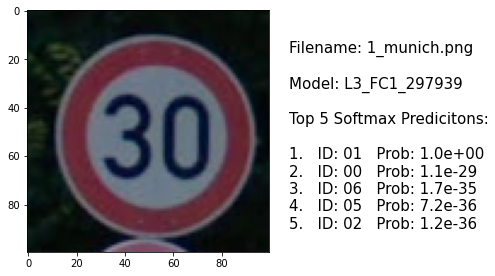

In [27]:
# Load image
test_img = mpimg.imread(test_img_path)

# Pre process image
if(f in crop_params):
    c = crop_params[f]
    test_img = test_img[c[1]:(c[1]+c[2]),c[0]:(c[0]+c[2])]

test_img_norm = pre_process_image(test_img)

# Start tf session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Restore pre trained model
    saver2 = tf.train.Saver()
    saver2.restore(sess, "trained_models/"+trained_model_filename)
    print("Model {} restored".format(trained_model_filename))

    print("\n### Start predicting for {}".format(f))
    
    # Get this image prediction
    prediction = sess.run(softmax_top5, feed_dict={x:[test_img_norm]})
    
print("\n### Finished, showing prediction results below:\n")

plt_fig, plt_ax = plt.subplots(1,1, figsize=(7,4))

plt_ax.imshow(test_img)

prob_text = "Filename: {}".format(f)
prob_text += "\n\nModel: {}".format(trained_model_filename)
prob_text += "\n\nTop 5 Softmax Predicitons:\n\n"
for i in range(len(prediction[1][0])):
    prob_text += "{}.   ID: {:0>2d}   Prob: {:.1e}\n".format(i+1,prediction[1][0][i],prediction[0][0][i]) 
plt.figtext(0.57,0.1,prob_text,size=15.0)
plt.subplots_adjust(left=0.05, right=0.53, top=1.0, bottom=0.0)

# Save results
plt.savefig("output_images/{}_{}.png".format(f.split('.')[0],trained_model_filename))

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [61]:
# Visualize the network's feature maps 
#   image_input: the test image being fed into the network to produce the feature maps
#   tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
#   activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
#   plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, layer_i, image_filename, activation_min=-1, activation_max=-1 ,plt_num=1):
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt_fig = plt.figure(plt_num, figsize=(15,math.ceil(featuremaps*2.6/8)))
    plt_fig.suptitle("Output FeatureMap of Conv Layer {} for '{}'".format(layer_i,image_filename), fontsize=25)
    for featuremap in range(featuremaps):
        plt.subplot(math.ceil(featuremaps/8),8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

INFO:tensorflow:Restoring parameters from trained_models/L3_FC1_297939
Model L3_FC1_297939 restored


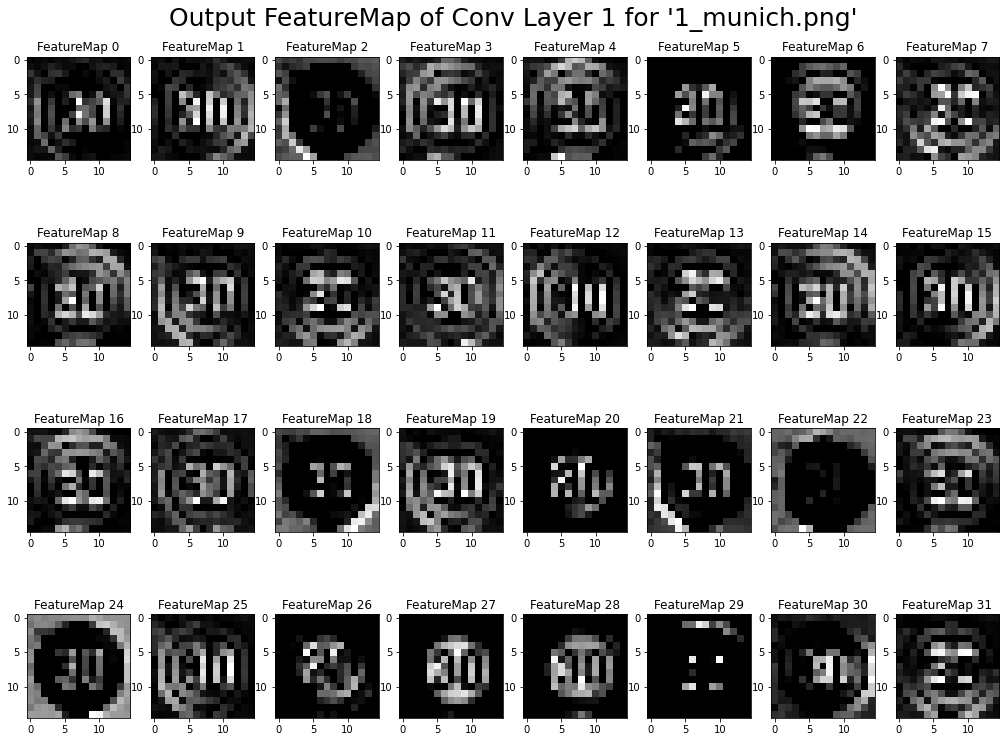

In [60]:
# Start tf session

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Restore pre trained model
    saver2 = tf.train.Saver()
    saver2.restore(sess, "trained_models/"+trained_model_filename)
    print("Model {} restored".format(trained_model_filename))

    # Generate featureMap for ConvNet layer 1
    outputFeatureMap([test_img_norm],conv1,1,f)
    # plt.savefig("output_images/{}_{}_{}.png".format(f.split('.')[0],trained_model_filename,"conv1"))
    
    # Generate featureMap for ConvNet layer 2
    # outputFeatureMap([test_img_norm],conv2,2,f)
    # plt.savefig("output_images/{}_{}_{}.png".format(f.split('.')[0],trained_model_filename,"conv2"))